# Resampling methods

In this notebook one can train different and compare models on data sets of different sizes. The train and test MSE and R2 values are plotted and saved to figures for each of the models trained on the different data sets.

The plots from this notebook are used in Figure 2, 3, 4, 5, 6 and 7 of the article.   

In [1]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

from Functions.gradientdescent_lib import *
from Functions.PLOT import plot, plot_thetas
from Functions.bootstrap import *
import random

c:\Users\maxfo\Python\Lib\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse


In [2]:
#generate standard dataset

np.random.seed(1)
x_train, x_test, y_train, y_test = generateData(100, noise = 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()

Comparison of samplesize 20 with samplesize 80 (whole dataset)

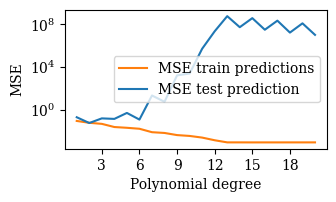

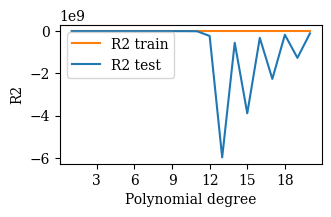

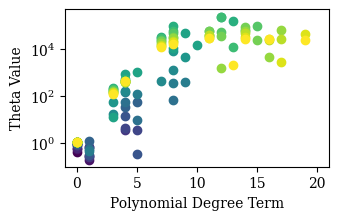

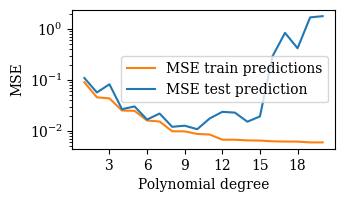

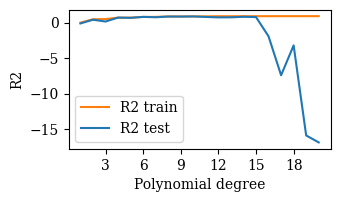

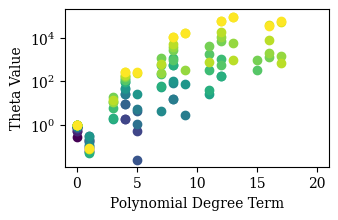

In [3]:
np.random.seed(1)
random.seed(1)
samplesizes = [20, 80]
n_degrees = 20

noIntercept = False

for i in range(len(samplesizes)):
    samplesize = samplesizes[i]

    poly_degrees = list(range(1, n_degrees+1))

    #pick out dataset
    indices = random.sample(range(0, len(x_train)), k = samplesize)

    x_sample = x_train[indices]
    y_sample = y_train[indices]

    MSEs_train = np.zeros(len(poly_degrees), dtype=float)
    MSEs_test = np.zeros(len(poly_degrees), dtype=float)

    R2s_train = np.zeros(len(poly_degrees), dtype=float)
    R2s_test = np.zeros(len(poly_degrees), dtype=float)

    thetas = []
    
    for p in poly_degrees:
        X_sample = featureMat(x_sample, p, noIntercept=noIntercept)
        X_test = featureMat(x_test, p, noIntercept=noIntercept)

        theta = theta_analytic_OLS(X_sample, y_sample)
        y_sample_pred = X_sample @ theta
        y_test_pred = X_test @ theta

        MSE_train = MSE(y_sample, y_sample_pred)
        MSE_test = MSE(y_test, y_test_pred)

        MSEs_train[p-1] = MSE_train
        MSEs_test[p-1] = MSE_test

        R2_train = R2(y_sample, y_sample_pred)
        R2_test = R2(y_test, y_test_pred)

        R2s_train[p-1] = R2_train
        R2s_test[p-1] = R2_test

        thetas.append(theta)
    

    plot(
        nGraphs = 2,
        x_axis_array = poly_degrees,
        y_features = [MSEs_train, MSEs_test],
        y_feature_label = ['MSE train predictions', 'MSE test prediction'],
        foldername = 'figures',
        figurename = f'OLS_MSE_{samplesize}',
        x_label = 'Polynomial degree',
        y_label = 'MSE',
        title = '',
        x_integer_entries = True,
        y_integer_entries = False,
        save = True,
        scatter = None,
        multiX = False,
        y_logplot = True
    )

    plot(
    nGraphs = 2,
    x_axis_array = poly_degrees,
    y_features = [R2s_train, R2s_test],
    y_feature_label = ['R2 train', 'R2 test'],
    foldername = 'figures',
    figurename = f'OLS_R2_{samplesize}',
    x_label = 'Polynomial degree',
    y_label = 'R2',
    title = '',
    x_integer_entries = True,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False
    )

    plot_thetas(
    thetas,
    foldername = 'figures',
    figurename = f'OLS_theta_values_{samplesize}',
    save = True
    )

    